In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import matplotlib.pyplot as plt

In [2]:
# Define the paths to the directories containing the images
train_dir = 'C:/Users/Tarun Reddy/Desktop/data 606 Final project/Test_trainSplit/train'
valid_dir = 'C:/Users/Tarun Reddy/Desktop/data 606 Final project/Test_trainSplit/valid'

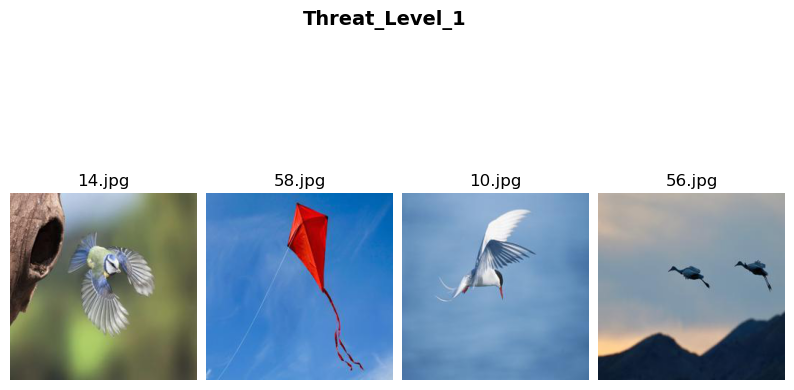

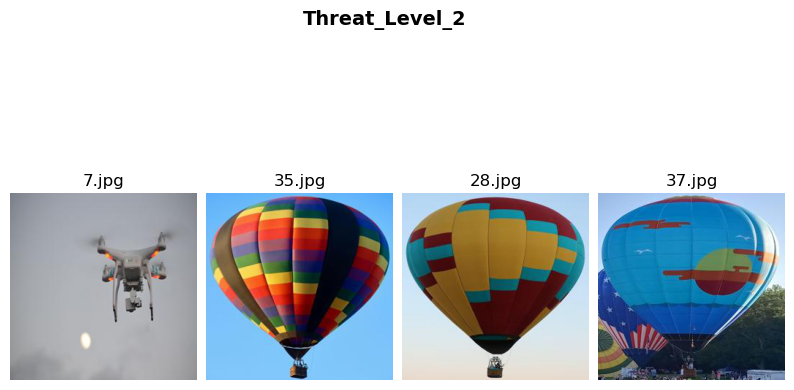

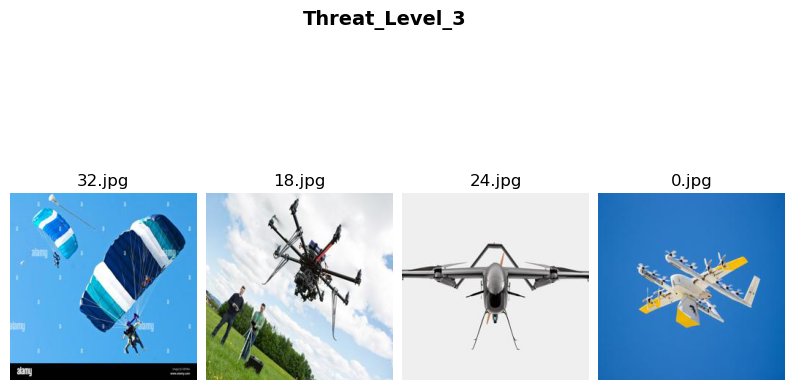

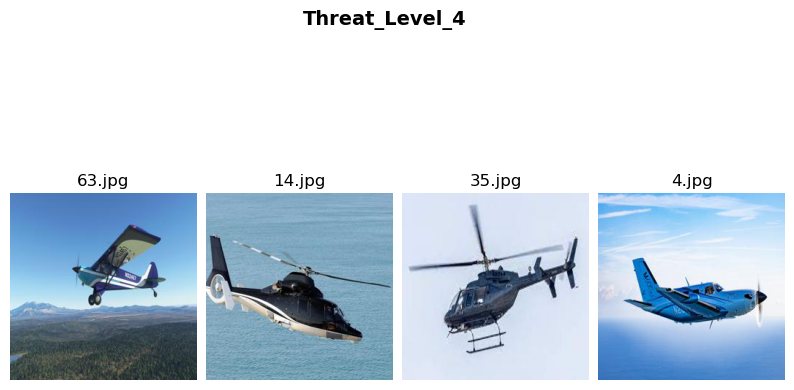

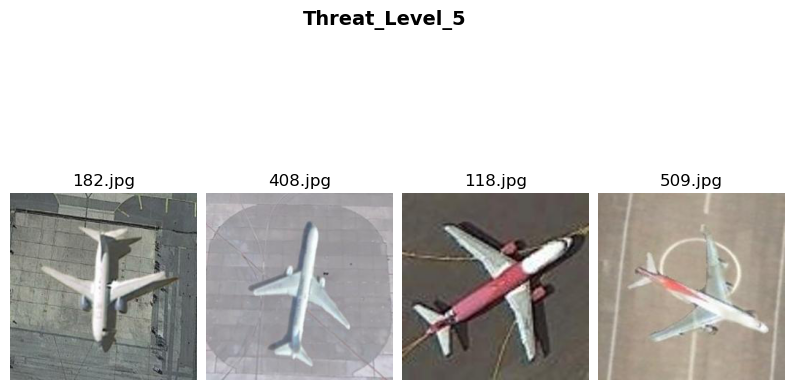

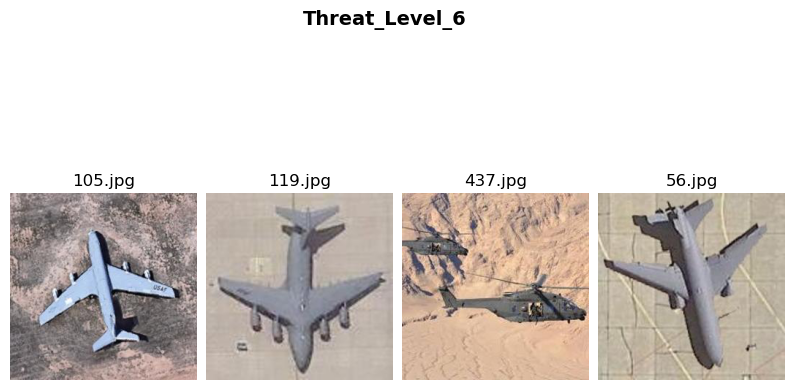

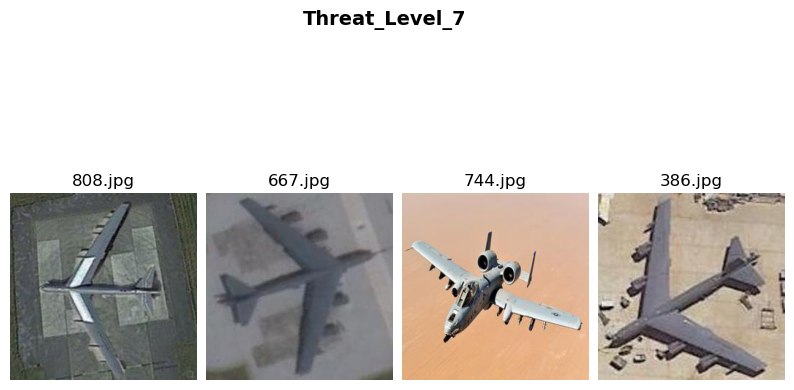

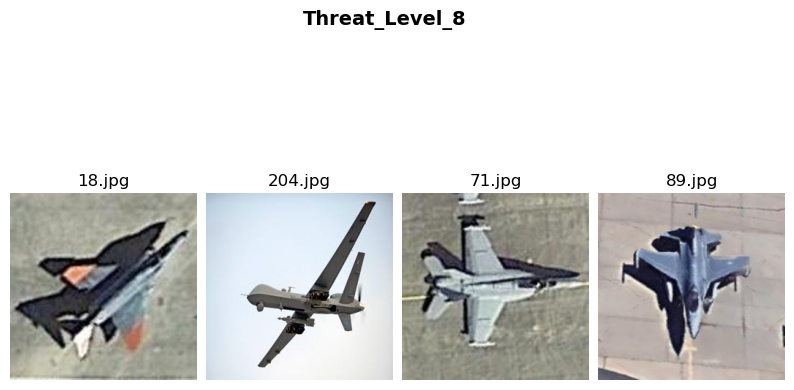

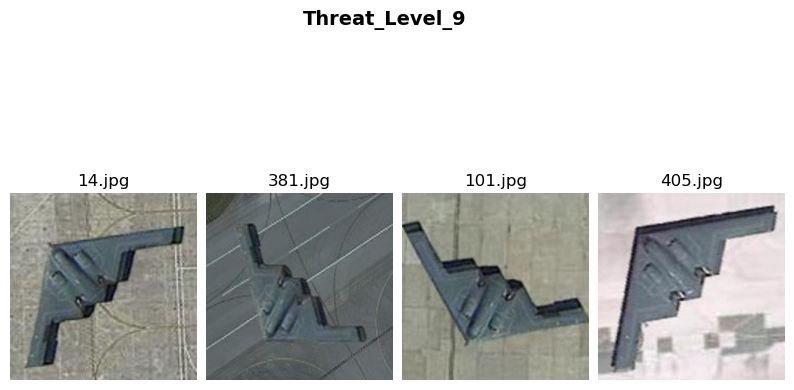

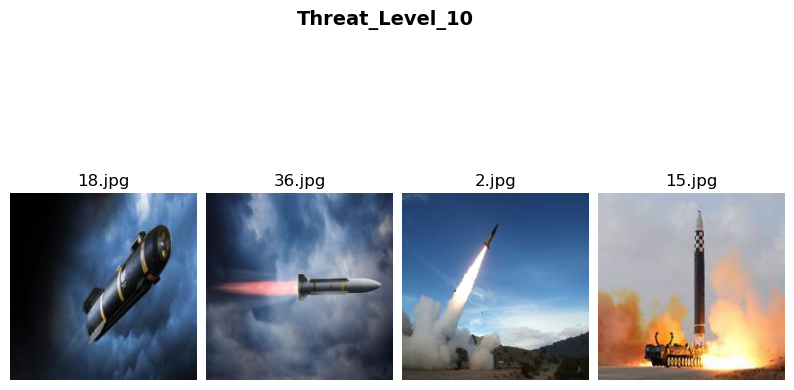

In [3]:

# Define the source directory containing the images

categories_path = 'C:/Users/Tarun Reddy/Desktop/data 606 Final project/Test_trainSplit/train'

# Define the figure size and font size
fig_size = (10, 5)
font_size = 12

# Loop through each subdirectory in the categories directory
for category_folder_index, category_folder in enumerate(sorted(os.listdir(categories_path), key=lambda x: int(x.split('_')[-1]))):
    # Get the full path of the subdirectory
    category_path = os.path.join(categories_path, category_folder)
    
    # Get the list of image file names in the subdirectory
    file_names = os.listdir(category_path)
    
    # Choose four images randomly
    sample_files = random.sample(file_names, 4)
    
    # Create a figure with subplots for the images
    fig, axes = plt.subplots(1, 4, figsize=fig_size)
    
    # Loop through each subplot and plot an image
    for i, ax in enumerate(axes):
        # Load the image from file
        img_path = os.path.join(category_path, sample_files[i])
        img = plt.imread(img_path)
        
        # Plot the image on the subplot
        ax.imshow(img)
        ax.set_title(sample_files[i], fontsize=font_size)
        ax.axis('off')
    
    # Set the title of the figure to the subdirectory name
    fig.suptitle(category_folder, fontsize=font_size+2, fontweight='bold', y=1.05)
    
    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.05)
    
    # Show the figure
    plt.show()

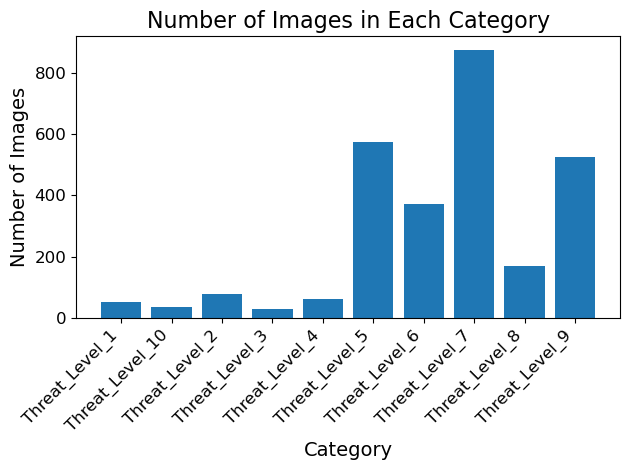

In [4]:
# Get the number of images in each category
categories = []
num_images = []
for category in os.listdir(categories_path):
    category_path = os.path.join(categories_path, category)
    num_files = len(os.listdir(category_path))
    categories.append(category)
    num_images.append(num_files)

# Create a bar chart of the number of images in each category
plt.bar(categories, num_images, color='#1f77b4')
plt.title('Number of Images in Each Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()

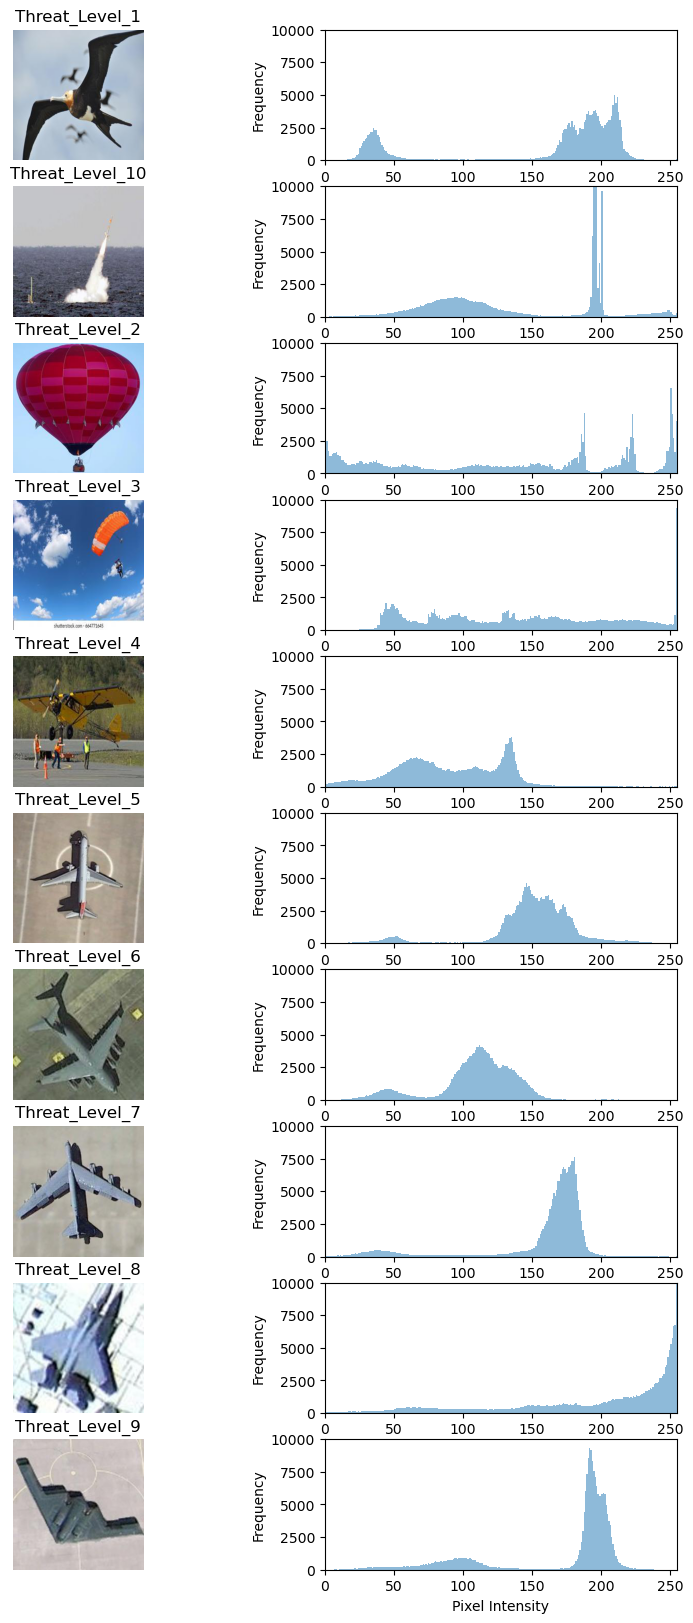

In [5]:
# Choose a random image from each category
num_categories = len(os.listdir(categories_path))
fig, axes = plt.subplots(num_categories, 2, figsize=(10, 20))
for i, category in enumerate(os.listdir(categories_path)):
    category_path = os.path.join(categories_path, category)
    file_names = os.listdir(category_path)
    sample_file = random.sample(file_names, 1)[0]
    img_path = os.path.join(category_path, sample_file)
    img = plt.imread(img_path)
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(category)
    axes[i, 1].hist(img.ravel(), bins=256, range=(0, 255), alpha=0.5)
    axes[i, 1].set_xlim([0, 255])
    axes[i, 1].set_ylim([0, 10000])
    axes[i, 1].set_xlabel('Pixel Intensity')
    axes[i, 1].set_ylabel('Frequency')
plt.show()

In [6]:
import os
import shutil

source_folder = 'C:/Users/Tarun Reddy/Desktop/data 606 Final project/Test_trainSplit/train'  
destination_folder = 'C:/Users/Tarun Reddy/Desktop/data 606 Final project/Test_CNN'  

# Loop through each folder in the source folder
for folder_name in os.listdir(source_folder):
    folder_path = os.path.join(source_folder, folder_name)
    
    # Create a new folder in the destination folder with the same name as the current folder
    new_folder_path = os.path.join(destination_folder, folder_name)
    os.makedirs(new_folder_path, exist_ok=True)
    
    # Copy the first 10 images from the current folder to the new folder
    for i, file_name in enumerate(os.listdir(folder_path)):
        if i >= 10:
            break
        file_path = os.path.join(folder_path, file_name)
        new_file_path = os.path.join(new_folder_path, file_name)
        shutil.copyfile(file_path, new_file_path)


In [10]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.callbacks import TensorBoard

# Set up the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Load the data
data_dir = 'C:/Users/Tarun Reddy/Desktop/data 606 Final project/Test_trainSplit/train'
class_names = os.listdir(data_dir)
x = []
y = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    filenames = os.listdir(class_dir)
    for filename in filenames[:100]:  # select a subset of 100 images from each class
        img_path = os.path.join(class_dir, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img /= 255.0  # normalize pixel values
        x.append(img)
        y.append(class_names.index(class_name))
x = np.array(x)
y = tf.keras.utils.to_categorical(y)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# Data augmentation on the training set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_datagen.fit(x_train)


# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs')

# Print the model summary
model.summary()


# Train the model
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_val, y_val))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 128)     

Found 100 images belonging to 10 classes.
4/4 [==============================] - 1s 196ms/step


C:\Users\Tarun Reddy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun Reddy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun Reddy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


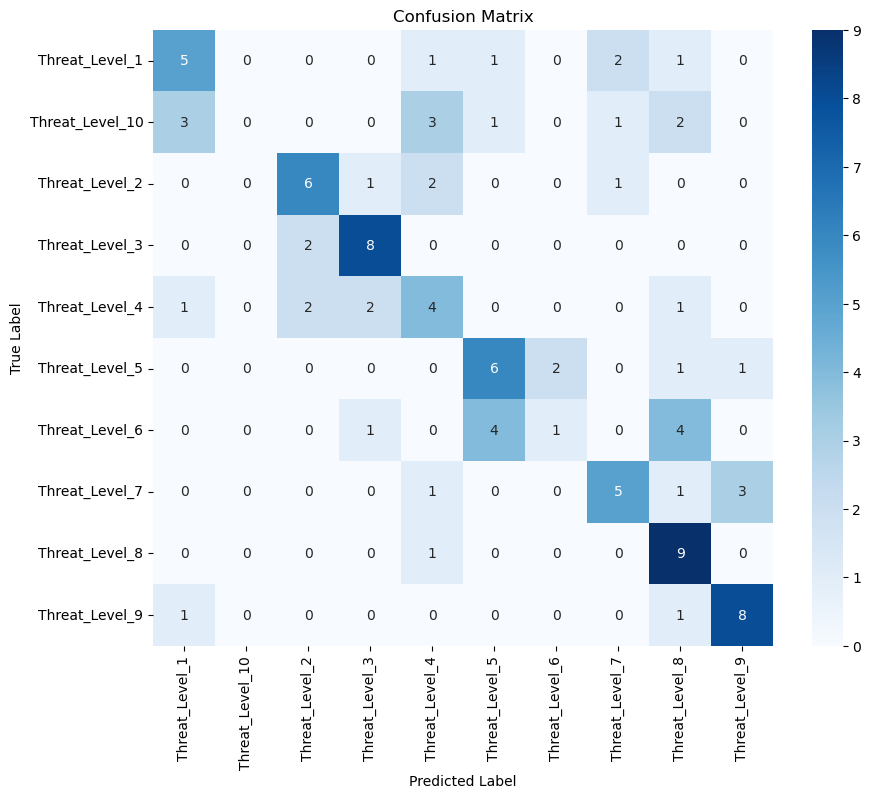

                 precision    recall  f1-score   support

 Threat_Level_1       0.50      0.50      0.50        10
Threat_Level_10       0.00      0.00      0.00        10
 Threat_Level_2       0.60      0.60      0.60        10
 Threat_Level_3       0.67      0.80      0.73        10
 Threat_Level_4       0.33      0.40      0.36        10
 Threat_Level_5       0.50      0.60      0.55        10
 Threat_Level_6       0.33      0.10      0.15        10
 Threat_Level_7       0.56      0.50      0.53        10
 Threat_Level_8       0.45      0.90      0.60        10
 Threat_Level_9       0.67      0.80      0.73        10

       accuracy                           0.52       100
      macro avg       0.46      0.52      0.47       100
   weighted avg       0.46      0.52      0.47       100



In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the test set into the model
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    'C:/Users/Tarun Reddy/Desktop/data 606 Final project/Test_CNN',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test set
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = test_data.classes

# Generate the confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=test_data.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(cr)

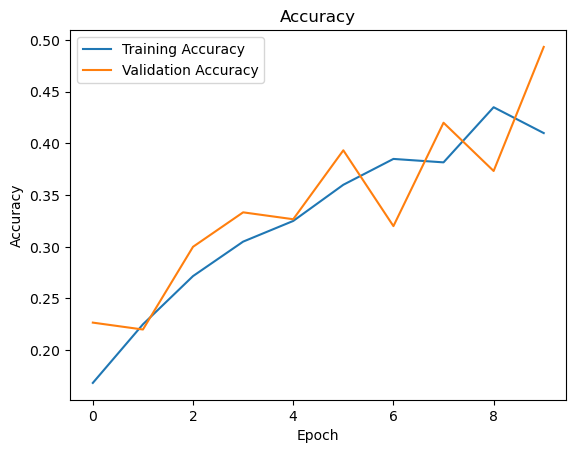

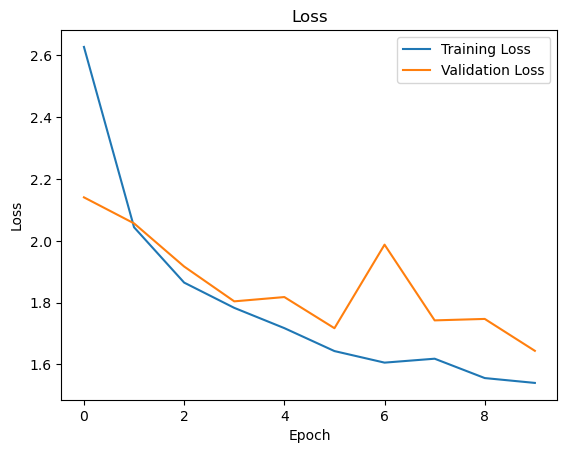

In [12]:
import matplotlib.pyplot as plt

# Extract the metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/10
19/19 [==============================] - 28s 1s/step - loss: 1.4905 - accuracy: 0.4317 - val_loss: 1.4939 - val_accuracy: 0.4867
Epoch 2/10
19/19 [==============================] - 28s 1s/step - loss: 1.4998 - accuracy: 0.4333 - val_loss: 1.5771 - val_accuracy: 0.4867
Epoch 3/10
19/19 [==============================] - 27s 1s/step - loss: 1.4017 - accuracy: 0.4783 - val_loss: 1.6477 - val_accuracy: 0.4200
Epoch 4/10
19/19 [==============================] - 27s 1s/step - loss: 1.4082 - accuracy: 0.4650 - val_loss: 1.5517 - val_accuracy: 0.4533


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model with model checkpointing
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint])

Epoch 1/10
19/19 [==============================] - 26s 1s/step - loss: 1.4296 - accuracy: 0.4633 - val_loss: 1.6791 - val_accuracy: 0.4600
Epoch 2/10
19/19 [==============================] - 25s 1s/step - loss: 1.3735 - accuracy: 0.4933 - val_loss: 1.8078 - val_accuracy: 0.3733
Epoch 3/10
19/19 [==============================] - 26s 1s/step - loss: 1.4235 - accuracy: 0.4867 - val_loss: 1.7676 - val_accuracy: 0.4133
Epoch 4/10
19/19 [==============================] - 26s 1s/step - loss: 1.3372 - accuracy: 0.4883 - val_loss: 1.4455 - val_accuracy: 0.4533
Epoch 5/10
19/19 [==============================] - 25s 1s/step - loss: 1.3684 - accuracy: 0.5033 - val_loss: 1.8786 - val_accuracy: 0.5133
Epoch 6/10
19/19 [==============================] - 25s 1s/step - loss: 1.3475 - accuracy: 0.5083 - val_loss: 1.4815 - val_accuracy: 0.5400
Epoch 7/10
19/19 [==============================] - 26s 1s/step - loss: 1.3258 - accuracy: 0.5383 - val_loss: 1.5719 - val_accuracy: 0.4933
Epoch 8/10
19/19 [==

In [16]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Define a learning rate schedule
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    else:
        return 0.0001

# Create a LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with learning rate scheduling
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[lr_scheduler])


Epoch 1/10
19/19 [==============================] - 26s 1s/step - loss: 1.0527 - accuracy: 0.6150 - val_loss: 1.4165 - val_accuracy: 0.5867 - lr: 0.0010
Epoch 2/10
19/19 [==============================] - 28s 1s/step - loss: 1.0630 - accuracy: 0.6283 - val_loss: 1.4409 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 3/10
19/19 [==============================] - 33s 2s/step - loss: 1.1055 - accuracy: 0.6017 - val_loss: 1.5385 - val_accuracy: 0.5600 - lr: 0.0010
Epoch 4/10
19/19 [==============================] - 31s 2s/step - loss: 1.1037 - accuracy: 0.5967 - val_loss: 1.4481 - val_accuracy: 0.5733 - lr: 0.0010
Epoch 5/10
19/19 [==============================] - 32s 2s/step - loss: 1.0918 - accuracy: 0.6183 - val_loss: 1.3700 - val_accuracy: 0.6200 - lr: 0.0010
Epoch 6/10
19/19 [==============================] - 34s 2s/step - loss: 0.9542 - accuracy: 0.6483 - val_loss: 1.4318 - val_accuracy: 0.6467 - lr: 1.0000e-04
Epoch 7/10
19/19 [==============================] - 35s 2s/step - loss: 0.8917

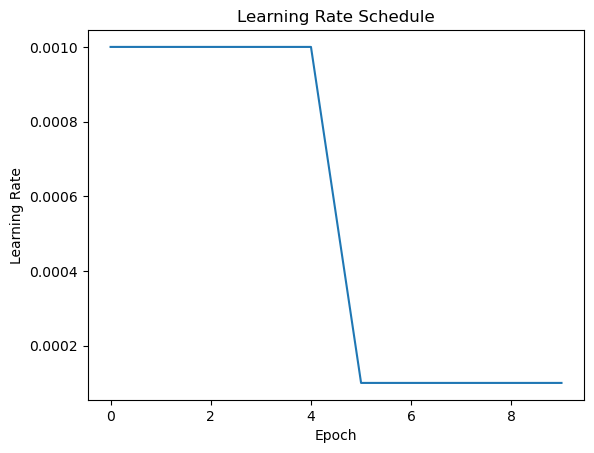

In [17]:
learning_rates = [lr_schedule(epoch) for epoch in range(len(history.history['loss']))]

plt.plot(learning_rates)
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()